In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

# Load data
csv_features = "./Dataset/acsincome_ca_features.csv"
csv_labels = "./Dataset/acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
sample = 0.05
num_samples = int(len(X_all)*sample)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)

On scalardise pas, ça nous empêche de regrouper bien les X et Y dans un dataframe sans Nan.

# 1. Corrélations entre les features et le label réel

In [65]:
# Construire un pandas Dataframe pour utiliser la fonction de corrélation
dfX = pd.DataFrame(X_train)
dfY = pd.DataFrame(Y_train)
df_train = pd.concat([dfX, dfY], axis=1)
df_train

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
50582,29.0,1.0,22.0,1.0,3258.0,6.0,0.0,45.0,2.0,1.0,True
165872,24.0,4.0,21.0,1.0,2350.0,6.0,9.0,20.0,1.0,1.0,False
60606,61.0,7.0,22.0,1.0,2360.0,6.0,0.0,35.0,2.0,8.0,True
170980,51.0,4.0,22.0,1.0,3030.0,6.0,1.0,40.0,2.0,9.0,True
55777,21.0,1.0,19.0,5.0,3401.0,6.0,2.0,40.0,1.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
168287,34.0,1.0,21.0,5.0,1050.0,4.0,12.0,40.0,1.0,9.0,True
81301,63.0,1.0,21.0,3.0,120.0,106.0,0.0,50.0,2.0,1.0,True
11330,32.0,1.0,21.0,1.0,1006.0,210.0,0.0,40.0,1.0,6.0,True
27793,25.0,1.0,1.0,5.0,8950.0,6.0,10.0,40.0,1.0,8.0,False


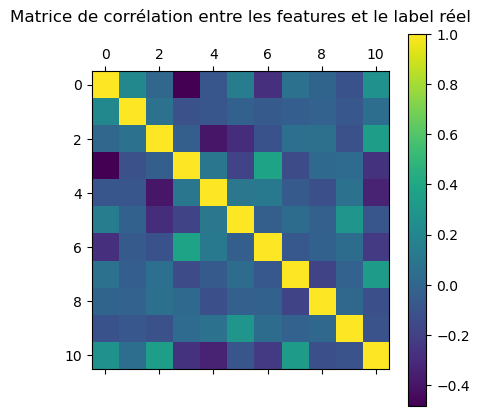

In [87]:
corr = df_train.corr()
plt.matshow(corr)

plt.title("Matrice de corrélation entre les features et le label réel\n")
plt.colorbar()
plt.show()

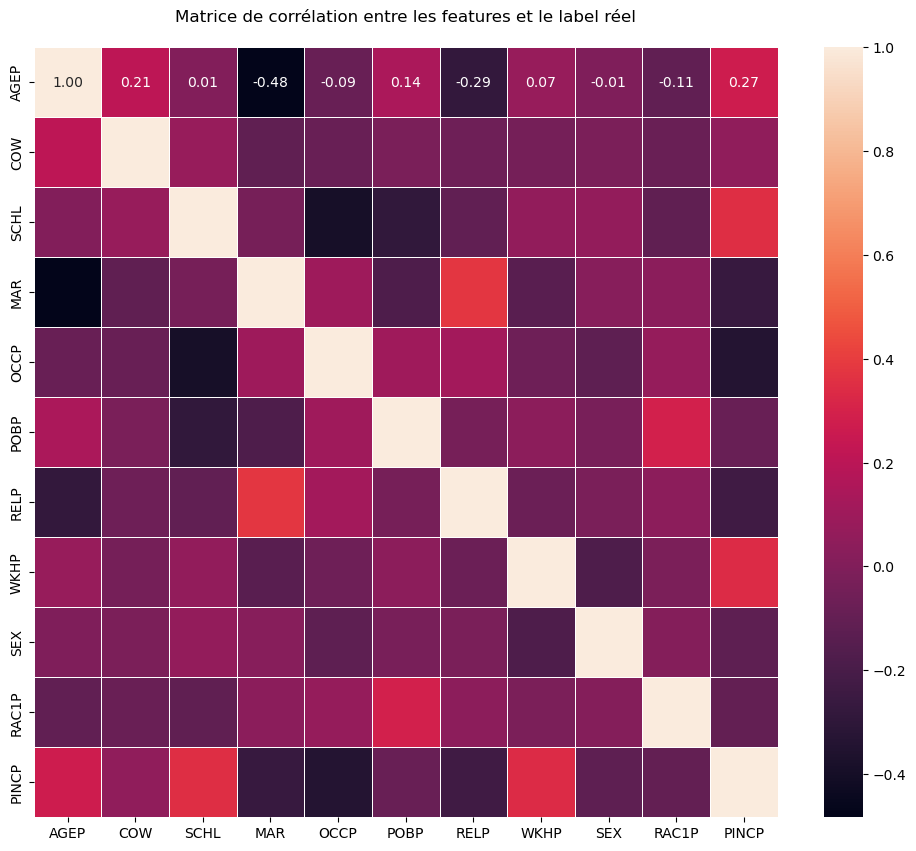

In [89]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features et le label réel\n")
plt.show()

# 2. Corrélations entre chacune des features et le label prédit

## SVM

In [2]:
# Meilleur modèle SVM : 
SVM_model = SVC(gamma=0.09)
SVM_model.fit(X_train, Y_train)

SVC(gamma=0.09)

In [4]:
# Construire un pandas Dataframe pour utiliser la fonction de corrélation
dfX = pd.DataFrame(X_train)
dfY = pd.DataFrame(SVM_model.predict(X_test))
df_train = pd.concat([dfX, dfY], axis=1)
df_train

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,0
47409,38.0,1.0,22.0,1.0,1320.0,120.0,0.0,46.0,1.0,1.0,NaN
93837,39.0,1.0,21.0,1.0,940.0,6.0,0.0,50.0,1.0,1.0,NaN
21296,40.0,1.0,1.0,1.0,8990.0,303.0,0.0,40.0,1.0,1.0,NaN
123187,51.0,1.0,1.0,1.0,8990.0,313.0,6.0,40.0,1.0,8.0,NaN
10662,34.0,3.0,19.0,1.0,800.0,6.0,0.0,40.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


**pour moi là on a un problème parce qu'il faut scalardiser les données entrainement X pour utiliser le modèle et en faisant ça on arrive plus à concatener les pandas**

## 3. Evaluation de l'importance de chaque feature